*Anna Goecke, Rodrigo Lopez Portillo Alcocer, Elizabeth Pankratz*

In this notebook, we walk the reader through how we developed a gold standard for our Taboo card generator based on existing Taboo cards, and how we created brand new Taboo cards.

# Section 1: Developing a gold standard

In this section, we present the workflow for how we used our gold standard dataset to generate a probability distribution, which we then used to determine which semantic relations that are most likely to appear on a Taboo card.
This gives us a way to generate more accurate, true-to-life versions of Taboo cards. 

The 240 Taboo cards that our gold standard is based on belong to Elizabeth's family's Canadian edition of Taboo, produced sometime in the 1990s or early 2000s.
These cards were transcribed into the text file `taboo_cards.txt` (in the current directory).
The module `gs_probdist` contains the functions needed for this section.
(Each function is documented with a docstring detailing the arguments and returned values, if the reader wants more information.)

In [ ]:
import gs_probdist as gspd

As a first step, the function `get_card_dicts()` combines two other `gspd` functions, `read_in()` and `format_cards()`, to read in the transcribed Taboo cards and produce a dictionaries whose entries each represent one of the cards. 
For example, the main word (MW) "syrup" is assigned to the dictionary's key, and its value is a list of the five corresponding taboo words (TWs).

In [13]:
card_dict = gspd.get_card_dicts()
card_dict['syrup']

['maple', 'pancakes', 'trees', 'sap', 'sweet']

`get_card_dicts()` provides the input for the function `cards_to_df()`, which converts this dictionary to a pandas dataframe.
In this dataframe, each row is a pairing of the MW with each of its TWs.
This format allows for easy annotation of the semantic relationship between each MW/TW pair.
The following cell shows the top five rows of the resulting dataframe, corresponding to one card.

In [15]:
gspd.cards_to_df(card_dict).head()

,mw,tw
0,huddle,gather
1,huddle,football
2,huddle,group
3,huddle,play
4,huddle,together


At this point, we exported this dataframe to a CSV file and manually categorised the following types of semantic relationship between each TW and its MW:

- **collocations** (i.e. combinations of words at rates more frequent than chance; see Evert 2009)
- **synonyms** (words meaning the same thing)
- **antonyms** (words with opposite meanings)
- **hyponyms** (a subset of a word's meaning, i.e. a more specific version)
- **hypernyms** (a superset of a word's meaning, i.e. a more general version)

We also had categories for cultural references---MWs and TWs relating in a way that requires cultural or world knowledge---and a catch-all "other" category.
We did not make an attempt to replicate these two categories, since our focus was on the linguistic aspect of this project.
We chose these semantic relations since they are fairly easy to operationalise using two tools that we have gotten to know this semester: word2vec word embeddings (for the collocations, since word embeddings represent textual co-occurrence; **CITATION NEEDED**) and WordNet (for all the others; **CITATION NEEDED**).

(The annotation guidelines can be found in `gs-annotation-guidelines.txt`.)

The rest of the functions in `gspd` are used to process the annotated gold standard dataset, which is saved as `gold-std-categorised.csv` in the current directory.
First, `read_in_categorised()` simply processes the csv file into a pandas dataframe with one row per MW/TW pairing and a 1 in the column of the category that that pair belongs to, and zeroes everywhere else, as illustrated in the next cell.

In [16]:
goldstd_data = gspd.read_in_categorised()
goldstd_data.head()

,mw,tw,semrel_synonym,semrel_antonym,semrel_hyponym,semrel_hypernym,collocation,cultural_ref,other
0,huddle,gather,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,huddle,football,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,huddle,group,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,huddle,play,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,huddle,together,0.0,0.0,0.0,0.0,1.0,0.0,0.0


This dataframe is used as input for the final two functions of `gspd`: `plot_category_freqs()`, to create the bar plot used in our presentation at the beginning of February, and the crucial `freq_dist_to_prob_dist()`, which converts the relative frequencies of each category into a probability distribution.
This probability distribution was then used to randomly supply a category for each of the five TW slots, in proportion to that category's actual frequency in the real Taboo cards.

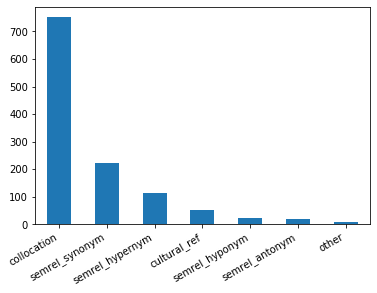

In [18]:
gspd.plot_category_freqs(goldstd_data);

In [20]:
category_prob_dist = gspd.freq_dist_to_prob_dist(goldstd_data)
category_prob_dist

{'collocation': 0.6634275618374559,
 'semrel_synonym': 0.19699646643109542,
 'semrel_hypernym': 0.10159010600706714,
 'semrel_hyponym': 0.020318021201413426,
 'semrel_antonym': 0.0176678445229682}

# Section 2: Determining semantic relations for the given word

filler

# Section 3: Putting it all together: Card generation

filler

# References
- Evert 2009
- the wordnet one
- the word2vec one